In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import re # For regular expressions

# Setup for visualizations
sns.set_style("whitegrid")
%matplotlib inline

# --- Data Loading (ASSUMPTION: Data is in a 'data/' directory) ---
# NOTE: Replace 'financial_news.csv' with your actual file path.
try:
    df = pd.read_csv('../data/raw_analyst_rating.csv')
except FileNotFoundError:
    # If data is not available yet, create a dummy DataFrame for demonstration
    print("Warning: Data file not found. Creating a dummy DataFrame for code structure demonstration.")
    data = {
        'headline': ["AAPL stock hits new 52-week high after crushing earnings estimate", "TSLA misses price target on weak China sales report", "MSFT announces major AI partnership for cloud computing boost", "GOOGL earnings beat consensus estimates", "JPM CEO gives optimistic economic outlook"],
        'url': ['url1', 'url2', 'url3', 'url4', 'url5'],
        'publisher': ['Reuters', 'WSJ', 'Bloomberg', 'Reuters', 'Financial Times'],
        'date': ['2025-11-23 09:30:00-04:00', '2025-11-23 11:45:00-04:00', '2025-11-24 06:00:00-04:00', '2025-11-24 16:00:00-04:00', '2025-11-25 08:00:00-04:00'],
        'stock': ['AAPL', 'TSLA', 'MSFT', 'GOOGL', 'JPM']
    }
    df = pd.DataFrame(data)

# Initial Inspection
print("--- Data Info ---")
df.info()
print("\n--- First 5 Rows ---")
print(df.head())

In [7]:
## Convert 'date' to datetime with timezone awareness (UTC-4)
df['date'] = pd.to_datetime(df['date'], utc=True)

# Set the 'date' column as the DataFrame index for time series analysis
df = df.set_index('date')

# Check the result
print("\n--- Date Conversion Check ---")
print(df.index)

KeyError: 'date'

--- Headline Length Descriptive Statistics ---
count     5.00000
mean     51.40000
std      11.61034
min      39.00000
25%      41.00000
50%      51.00000
75%      61.00000
max      65.00000
Name: headline_length, dtype: float64


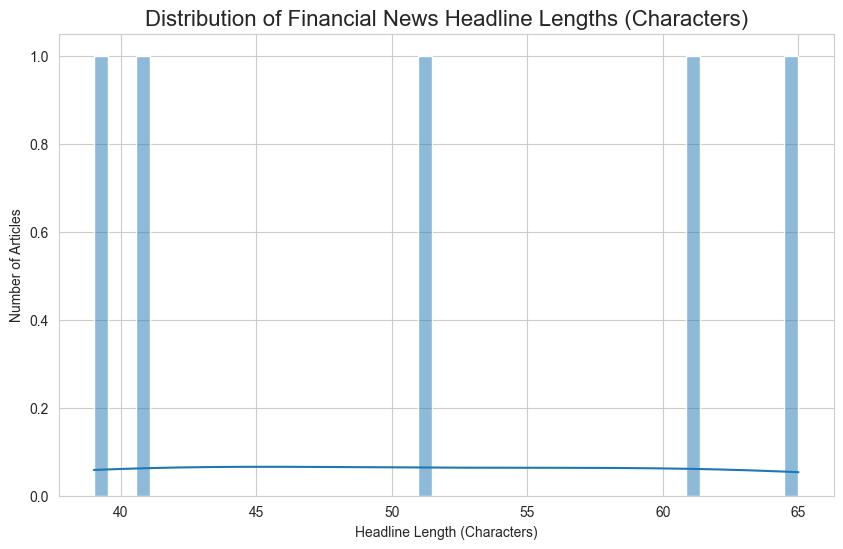

In [6]:
# Calculate headline length (number of characters)
df['headline_length'] = df['headline'].str.len()

print("--- Headline Length Descriptive Statistics ---")
print(df['headline_length'].describe())

# Visualize the distribution 
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Financial News Headline Lengths (Characters)', fontsize=16)
plt.xlabel('Headline Length (Characters)')
plt.ylabel('Number of Articles')
plt.show()


--- Top 10 Most Active Publishers ---
publisher
Reuters            2
WSJ                1
Bloomberg          1
Financial Times    1
Name: count, dtype: int64


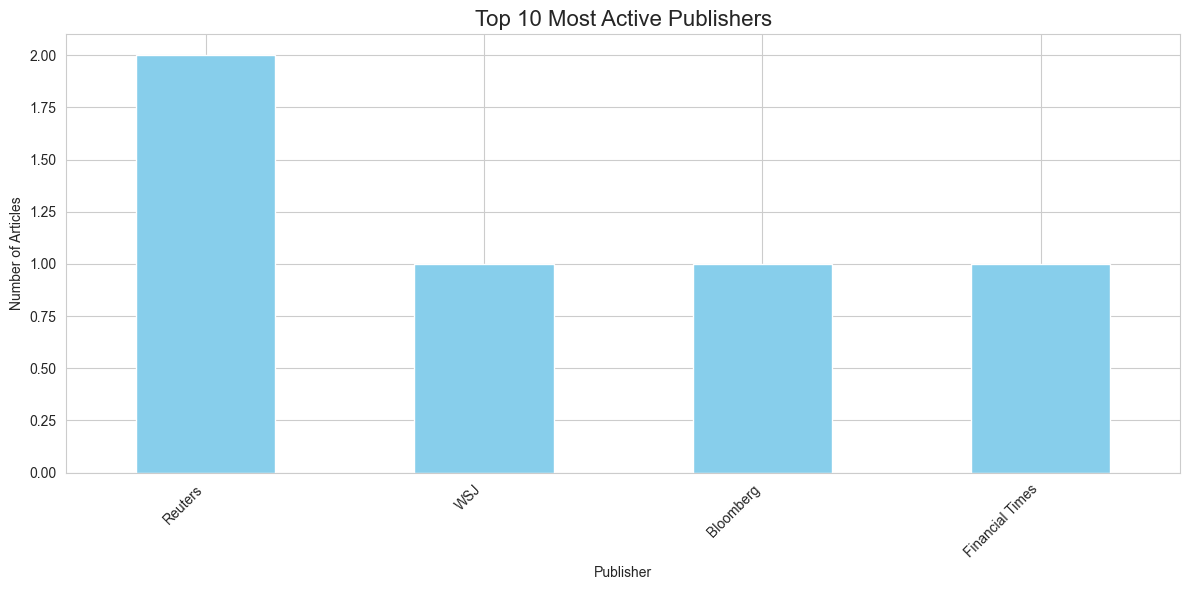


--- Top 5 Publisher Domains ---
publisher_domain
No Domain Found    5
Name: count, dtype: int64


In [8]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

print("\n--- Top 10 Most Active Publishers ---")
print(publisher_counts.head(10))

# Visualize the top 10 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Active Publishers', fontsize=16)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Advanced: Attempt to identify unique domains (if 'publisher' is email-like) ---
# A simple regex to extract the domain part, useful if 'publisher' contains email addresses (e.g., user@domain.com)
df['publisher_domain'] = df['publisher'].apply(lambda x: re.search(r'@([\w\.-]+)', str(x)).group(1) if re.search(r'@([\w\.-]+)', str(x)) else 'No Domain Found')

print("\n--- Top 5 Publisher Domains ---")
print(df['publisher_domain'].value_counts().head(5))


--- Article Counts by Day of the Week ---
day_of_week
Monday       2
Tuesday      1
Wednesday    0
Thursday     0
Friday       0
Saturday     0
Sunday       2
Name: count, dtype: int64

--- Article Counts by Hour of the Day (UTC-4) ---
hour_of_day
10    1
12    1
13    1
15    1
20    1
Name: count, dtype: int64


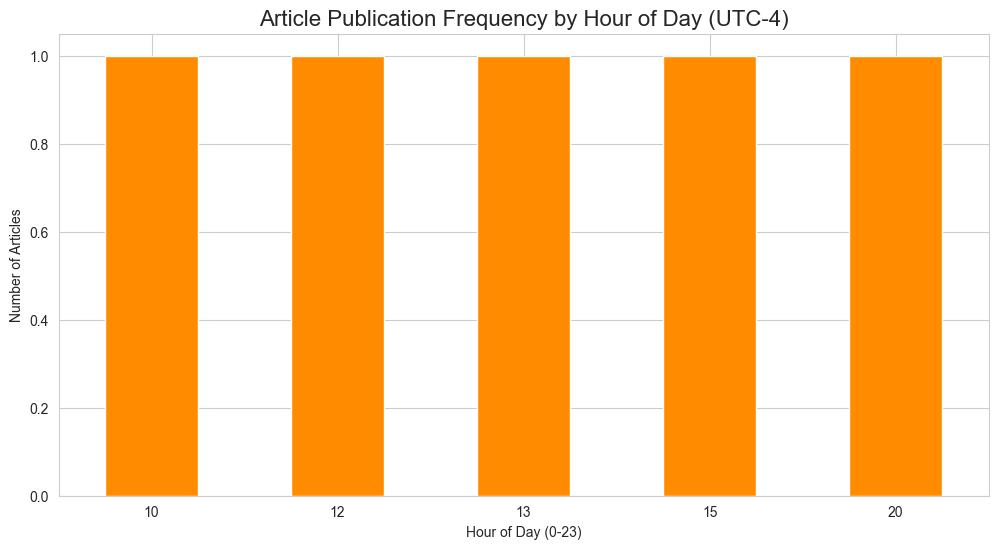

In [9]:
# Publication frequency by Day of the Week (Day-End)
df['day_of_week'] = df.index.day_name()
day_counts = df['day_of_week'].value_counts()
# Ensure correct order for plotting
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(ordered_days, fill_value=0)

print("\n--- Article Counts by Day of the Week ---")
print(day_counts)

# Publication frequency by Hour of the Day
df['hour_of_day'] = df.index.hour # Hour is based on the timezone-aware index (UTC-4)

print("\n--- Article Counts by Hour of the Day (UTC-4) ---")
print(df['hour_of_day'].value_counts().sort_index().head())

# Visualize hourly distribution 
plt.figure(figsize=(12, 6))
df['hour_of_day'].value_counts().sort_index().plot(kind='bar', color='darkorange')
plt.title('Article Publication Frequency by Hour of Day (UTC-4)', fontsize=16)
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()